In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


In [21]:
#North data
data = pd.read_csv('../Data_final/OTI_north_waverider_2024.csv')
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time', inplace=False)
data['temp_inv'] = data.Temp - data.TempB


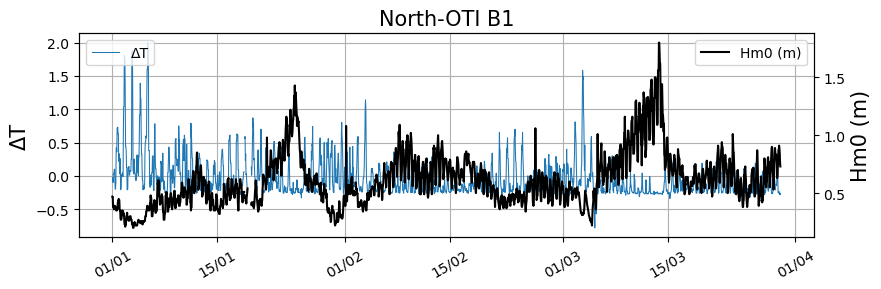

In [23]:
#Change the time
start_time = pd.to_datetime('2024-01-01 00:00:00')
end_time = pd.to_datetime('2024-03-30 00:00:00')

data_clip = data[(data.index >= start_time) & (data.index <= end_time)]


fig, (ax1) = plt.subplots(figsize=(9, 3))


# Plot data for sensor_south
ax1.plot(data_clip.index,
         data_clip['temp_inv'], label='ΔT', lw =0.75)
ax1.set_title('North-OTI B1', fontsize=15)
ax1.set_ylabel('ΔT', fontsize=15)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax1.tick_params(axis='x', labelsize=10, rotation=30)

ax2 = ax1.twinx()
ax2.plot(data_clip.index,
         data_clip['Hm0'], c='k', label='Hm0 (m)')
ax2.set_ylabel('Hm0 (m)', fontsize=15)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()

plt.tight_layout()
